# Unsupervised Learning - Creating Customer Segment

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In this notebook, I will analyze a dataset contains customers' various spending of different products and identify appropriate customer segments using KMeans.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Exploration

In [61]:
df = pd.read_csv('Wholesale customers data.csv')
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [63]:
# Drop unused features: Channel and Region
df = df.drop(columns=['Channel', 'Region'])

In [64]:
# Median of each category
df.median()

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64

In [65]:
# Display statistical description of the dataset: 
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


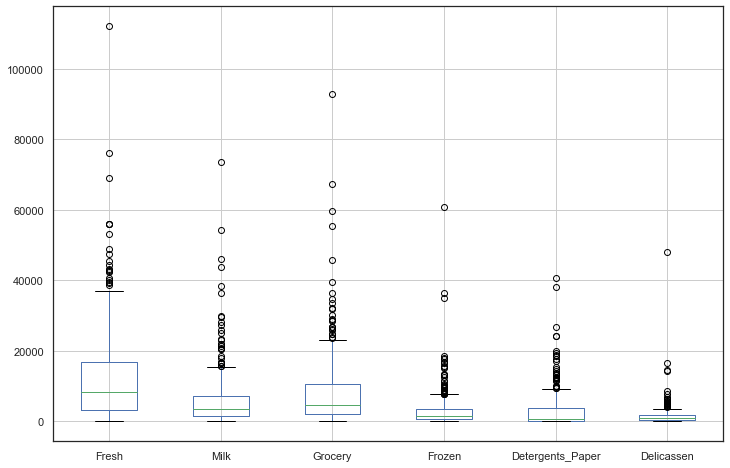

In [66]:
# Data visualization 
df.boxplot(return_type='axes', figsize=(12,8))
plt.show()

# Samples selection for further analysis

I will select three samples and explore them in details

In [67]:
sample = df.loc[[2, 180, 340], :]

In [68]:
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,6353,8808,7684,2405,3516,7844
180,12356,6036,8887,402,1382,2794
340,381,4025,9670,388,7271,1371


Sample 1: First sample is likely to be a medium-sized grocery shop as its Milk, Frozen, Detergents Paper and Delicassen purchase amounts are relatively higher than their respective median values (8808 vs 3627, 2405 vs 1526 3516 vs 816.5 and 7844 vs 965). 

Sample 2: This sample appears to be a fresh supermarket with an higher expediture of Fresh, Milk, Grocery, Detergens_Paper and Delicassen compared to the median (12356 vs 8504, 6036 vs 3627, 8887 vs 4755.5, 1382 vs 816.5, 2794 vs 965.5) with the exception of Frozen (402 vs 1526). 

Sample 3: Third sample may be a small corner shop as its has very low purchase for Fresh and Frozen (381 vs 8504 and 388 vs 1526) and higher purchase for Milk, Grocery, Detergents_Paper and Delicassen (4025 vs 3627, 9670 vs 4755.5, 7271 vs 816.5, 1371 vs 965.5).



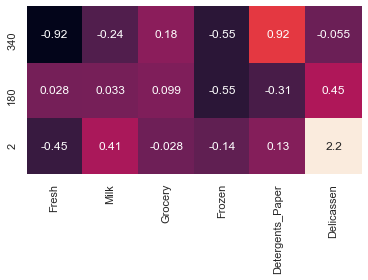

In [69]:
# Comparison with samples and population means
fig, ax = plt.subplots()
sns.heatmap((sample-df.mean())/df.std(ddof=0), annot=True, cbar=False, square=True)
ax.set_ylim([0,3]);

# Feature relevance
In this section I will use Decision Tree Regressor to determine if cusotmers purchase a certain amount of product will necessarily purchase some proportional amount of other products.

In [70]:
# Import library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [71]:
# Create a new copy of the dataset: 
df_copy = df.copy()

In [72]:
# In this scenario I will first use 'Grocery' as my target variable
X = df_copy.drop('Grocery', axis=1).values # drop the target variable
y = df['Grocery'].values # keep only target variabl

In [73]:
# Use train_test_split to randomly split out data, training size 75% and test size 25% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor(random_state=1)

# Fit it to the data
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [74]:
# Display the prediction score
score = tree.score(X_test, y_test)
print(score)

0.7957683115761958


In [75]:
# Create a list of features
vars = list(df.columns)

# Create loop to test each feature as a dependent variable
for var in vars: 
    X = df_copy.drop([var], axis=1).values
    y = df[var].values 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    tree = DecisionTreeRegressor(random_state=1)
    tree.fit(X_train, y_train)
    print('R2 score for', var, 'as a target variable is: ', tree.score(X_test, y_test))

R2 score for Fresh as a target variable is:  -0.9233736592978437
R2 score for Milk as a target variable is:  0.5158499438066617
R2 score for Grocery as a target variable is:  0.7957683115761958
R2 score for Frozen as a target variable is:  -0.6495743273336552
R2 score for Detergents_Paper as a target variable is:  0.8152412791948308
R2 score for Delicassen as a target variable is:  -0.4291251956585451


When I set Fresh, Frozen, and Delicassen as the target variable, I end up with negative R squared, meaning the horizontal line explains the data better than our models. 

Milk, Grocery and Detergents_Paper appear to have relatively higher R squared. 

# Feature Distribution

In [76]:
from pandas.plotting import scatter_matrix, parallel_coordinates

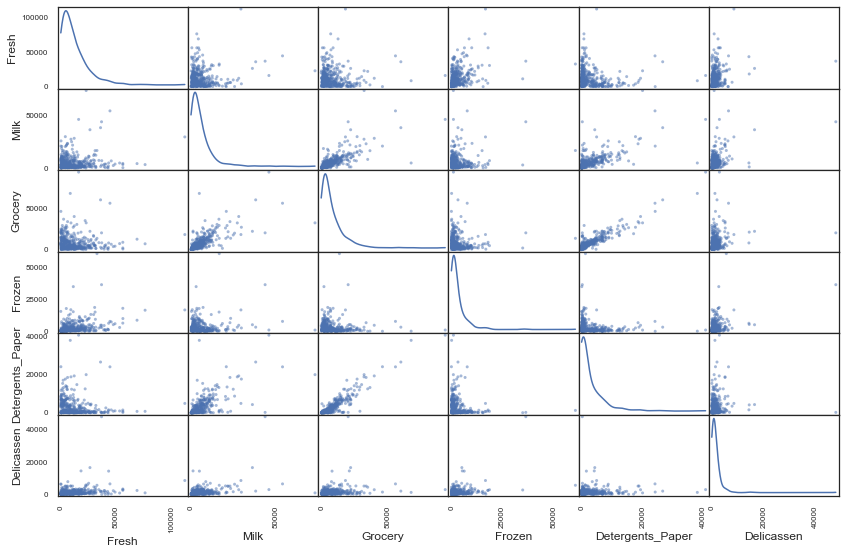

In [77]:
_ = scatter_matrix(df, figsize=(14, 9), diagonal='kde')

Our data does not have normal distribution (right skewness) due to the presence of outliers. I will remove these outliers in the Preprocessing section below.

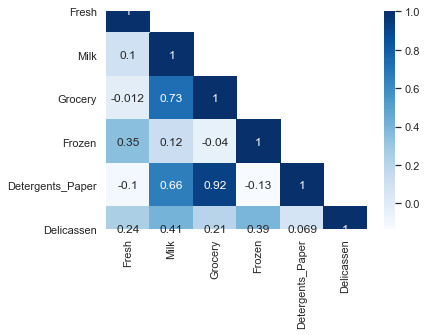

In [78]:
# Plot a correlation matrix
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True


with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, cmap='Blues', square=True, annot=True)

The following pairs have strong correlation: Milk and Grocery, Detergents_Paper and Milk, and Detergents_Paper and Grocery.

# Data Preprocessing

# Feature Scaling

I chose to use logarithmic scale to transform data skewness towards large values. 

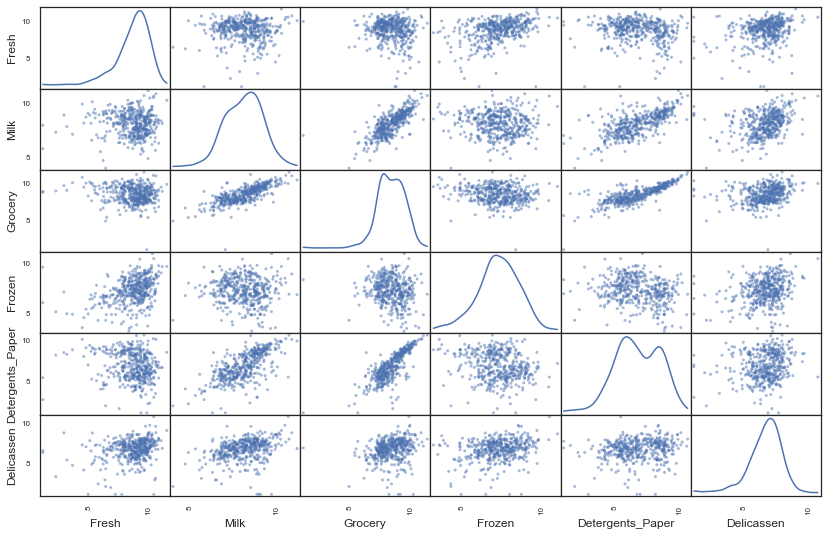

In [79]:
#  Scale the data using the natural logarithm
log_data = np.log(df)

#  Scale the samples using the natural logarithm
log_sample = np.log(sample)

# Plot the scatter matrix of the transformed features
_ = scatter_matrix(log_data, figsize=(14, 9), diagonal='kde')

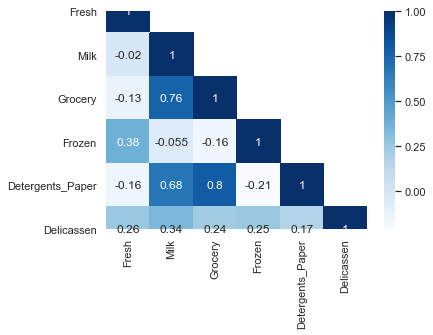

In [80]:
# Plot a correlation matrix
sns.set(style="white")
# Compute the correlation matrix
corr = log_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True


with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, cmap='Blues', square=True, annot=True)

After the transformation, I noticed that: 
- Milk and Grocery has a slightly stronger correlation. 
- Detergents_Paper and Milk has a slightly stronger correlation.
- Detergents_Paper and Grocery has a weaker correlation. 

In [81]:
display(log_sample)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
180,9.421897,8.705497,9.092345,5.996452,7.231287,7.935230
340,5.942799,8.300280,9.176784,5.961005,8.891649,7.223296


# Outliers Dectection

I will apply Tukey's rule to find outliers based on the quartiles of the data. Outliers can be defined as those values more than 1.5 times the interquatile range from the quartiles.

In [82]:
from collections import Counter
import itertools

In [83]:
outliers_index_list = []
# iterate over features(columns)
for col in vars:
    # 1st quartile (25%)
    Q1 = np.percentile(log_data[col], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(log_data[col], 75)
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    # outlier step
    outlier_step = 1.5 * IQR
    # Determine a list of indices of outliers for feature col
    outliers = log_data[(log_data[col] < Q1 - outlier_step) | (log_data[col] > Q3 + outlier_step)]
    outliers_index_list.append(list(outliers.index))
    # Display the outliers for each feature: 
#     print('Outliers for feature {}:'.format(col))
#     display(outliers)

In [84]:
# convert list of list of indexes to list of indexes 
outliers_index = list(itertools.chain.from_iterable(outliers_index_list))

# find the unique index
unique_index = list(set(outliers_index))

# find the indexes appear more than once
duplicate_index = list(set([x for x in outliers_index if outliers_index.count(x) > 1]))

print('List of outliers:', unique_index)
print('List of outliers for more than one feature:', duplicate_index)

List of outliers: [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
List of outliers for more than one feature: [128, 65, 66, 75, 154]


I will remove those data points considered outliers for than one feature. Noted that my samples are not included in the list above.

In [85]:
# Remove duplicate outliers from the dataset
new_log_data = log_data.drop(log_data.index[duplicate_index]).reset_index(drop = True)

In [86]:
# New log data
new_log_data.shape

(435, 6)

# Feature Transformation

In this section, I will use Principal Component Analysis (PCA) to curse the dimentionality.

In [87]:
from sklearn.decomposition import PCA

In [88]:
# Instantiate PCA with the same number of dimensions as features
pca = PCA(n_components=6)

# Fit it to the data
pca.fit(new_log_data)

# Transform the log samples 
pca_samples = pca.transform(log_sample)

# Print explained variance 
print('Individual proportion', pca.explained_variance_ratio_)
print('Cummulative proportion', np.cumsum(pca.explained_variance_ratio_))

Individual proportion [0.44302505 0.26379218 0.1230638  0.10120908 0.04850196 0.02040793]
Cummulative proportion [0.44302505 0.70681723 0.82988103 0.93109011 0.97959207 1.        ]


Noted approximately 71% of total variance can be preserved by the first two components while approximately 93% of the variance can be preserved by the first four components. 

In [89]:
# Print the components
print(pca.components_)

[[ 0.16746374 -0.40143866 -0.43811142  0.17820975 -0.75142613 -0.14987105]
 [-0.68593522 -0.16722783 -0.07072902 -0.50054207 -0.04244398 -0.49414702]
 [-0.67738927  0.04020501 -0.01953317  0.31504299 -0.21170161  0.62855082]
 [-0.204293    0.01281068  0.05567564  0.78544905  0.20961368 -0.54233972]
 [-0.00261356  0.71923846  0.3553861  -0.0330861  -0.55815441 -0.20918629]
 [ 0.02915623 -0.54018269  0.82053348  0.02054106 -0.18238824  0.01974794]]


In [90]:
# df.columns

- First component associated with Milk, Grocery and Detergents_Paper. This is expected as we found that these three features are correlated. 
- Second component associated with Fresh, Detergents_Paper and Delicassen. 
- Third component associated with Fresh and Delicassen. 
- Fourth component associated with Frozen and Delicassen.

In [91]:
display(pd.DataFrame(np.round(pca_samples, 2), columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5', 'Dimension 6']))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.88,-1.60,1.32,-0.54,-0.39,-0.31
1,-1.15,-0.56,-0.16,-1.72,0.18,0.14
2,-2.75,2.19,1.37,-0.30,-0.85,0.01


# Dimensionality Reduction

I decided to retain 2 components as they preserved 71% of the total variance.

In [92]:
# Instantiate PCA 
pca = PCA(n_components=2)

# Fit it to the data
pca.fit(new_log_data)

# Transform the new_log_data
pca_data = pca.transform(new_log_data)

# Transform the log samples 
pca_samples = pca.transform(log_sample)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(data=pca_data, columns=['Dimension 1', 'Dimension 2'])

In [93]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.8834,-1.5991
1,-1.1464,-0.5574
2,-2.7506,2.1899


# Clustering

In [94]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [96]:
# Try different number of clusters 
for i in range(2, 9): 
    # Instantiate KMeans
    km = KMeans(n_clusters=i, random_state=1)

    # Fit it to the data
    km.fit(pca_data)

    # Predict the cluster
    preds_test = km.predict(pca_data)

    # Predict the cluster for log samples
    sample_preds = km.predict(pca_samples)

    # Find the centers
    centers_test = km.cluster_centers_

    # Calculate the mean silhouette coefficient 
    score = silhouette_score(pca_data, preds_test, random_state=1)
    print(i, score)

2 0.42628101546910846
3 0.3964019299623205
4 0.3312459160606664
5 0.34999779752629756
6 0.36192064528079665
7 0.3648753591099507
8 0.36405497488401767


In [102]:
# Instantiate KMeans
km = KMeans(n_clusters=2, random_state=1)

# Fit it to the data
km.fit(pca_data)

# Predict the cluster
preds = km.predict(pca_data)

# Predict the cluster for log samples
sample_preds = km.predict(pca_samples)

# Find the centers
centers = km.cluster_centers_

# Calculate the mean silhouette coefficient 
score = silhouette_score(pca_data, preds, random_state=1)
print(score)

0.42628101546910846


The best score is resulted from using 2 clusters.

# Data Recovery

The current dataset is scaled and reduced dimension, so we need to recover the original dataset and display the true centers (customer segments).

In [97]:
# Inverse transform the log centers to their original space
orig_centers = pca.inverse_transform(centers)

# Exponetiate the centers
true_centers = np.exp(orig_centers)

# Display the customer segments
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]

true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())

true_centers.index = segments

print(true_centers)

            Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Segment 0  4005.0  7900.0  12104.0   952.0            4561.0      1036.0
Segment 1  8867.0  1897.0   2477.0  2088.0             294.0       681.0


# Results Review

In [104]:
for i, preds in enumerate(sample_preds):
    print("Sample", i + 1, "is predicted to be in Segment", preds)

Sample 1 is predicted to be in Segment 0
Sample 2 is predicted to be in Segment 0
Sample 3 is predicted to be in Segment 0


In [99]:
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,6353,8808,7684,2405,3516,7844
180,12356,6036,8887,402,1382,2794
340,381,4025,9670,388,7271,1371


Sample 1: It makes sense that sample 1 belongs to Segment 0 as it has very high spending on Milk, Grocery, Detergents_Paper, Delicassen 

Sample 2: It also makes sense that sample 2 belongs to Segment 0 as it has very high spending on Milk, Grocery, Detergents_Paper, Delicassen

Sample 3: It is evident that sample 3 belongs to Segment 0 because spending on Milk, Grocery, Frozen, Detergents_Paper, Delicassen are very close to the center of Segment 0 with the exception of Fresh. 